In [1]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import zero_one_loss

sns.set_theme()
Dataset = pd.read_csv('Dataset_final_5classes.csv')
#Dataset.round(2)
Dataset

,anoNascimento,idDisciplina,idSerie,EscolaridadeResponsavel,idEstadoCivilResponsavel,Total_Faltas,numeroReprovacoes,AprovacoesComExcelencia,Aprovacoes,Diciplina,sexo_int,situacaoDisciplina_inteiro
0,2002,3,49,1.0,2.0,0,100.0,0.000000,0.000000,1,1,1
1,2002,3,49,6.0,2.0,0,100.0,0.000000,0.000000,1,1,1
2,2002,8,49,1.0,2.0,0,100.0,0.000000,0.000000,28,1,1
3,2002,8,49,2.0,2.0,0,100.0,0.000000,0.000000,28,1,1
4,2002,26,49,2.0,2.0,0,100.0,0.000000,0.000000,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
52765,2006,38,50,1.0,2.0,0,0.0,29.411765,58.823529,31,1,10
52766,2006,38,50,7.0,2.0,0,0.0,29.411765,58.823529,31,1,10
52767,2006,59,50,1.0,2.0,0,0.0,29.411765,58.823529,13,1,10
52768,2006,59,50,7.0,2.0,0,0.0,29.411765,58.823529,13,1,10


In [2]:
# Dataset = Dataset.dropna()
missing_data = Dataset.isna().sum()
print(missing_data)

anoNascimento                   0
idDisciplina                    0
idSerie                         0
EscolaridadeResponsavel       360
idEstadoCivilResponsavel      360
Total_Faltas                    0
numeroReprovacoes               0
AprovacoesComExcelencia         0
Aprovacoes                      0
Diciplina                       0
sexo_int                        0
situacaoDisciplina_inteiro      0
dtype: int64


**Para Validação Dividimos os Dados:** 
- **Treino**,75%
- **Validação**, 10%
- **Teste**, 15%

In [23]:
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste 85% (treino + validação) e 15% teste:
D_treino, D_teste = train_test_split(Dataset, test_size=.15, random_state=30) #test_size, por padrão é 25%

#print("D_treino e Validação: ", D_treino.shape, dict(D_treino.iloc[:, 0].value_counts()))
#print("D_teste: ", D_teste.shape, dict(D_teste.iloc[:, 0].value_counts()))

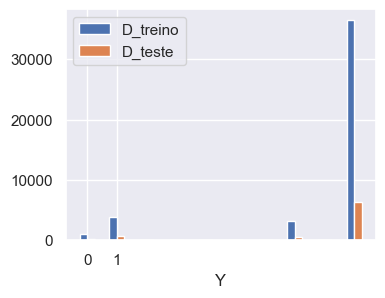

In [24]:
# visualizar as amostras:
plt.figure(figsize=(4,3))
plt.hist([D_treino.iloc[:, -1], D_teste.iloc[:, -1]], align='left', rwidth=0.5)
plt.legend(['D_treino','D_teste'])
plt.xlabel('Y'), plt.xticks([0,1])
plt.show()

**Árvore de Decisão**:

In [25]:
from sklearn import tree

M = tree.DecisionTreeClassifier()
M

DecisionTreeClassifier()

In [26]:
# Selecionado os atributos e classes de treino e teste.
X_treino = D_treino.iloc[:, 0:11]
Y_treino = D_treino.iloc[:, -1]
print("D_treino: ", (X_treino.shape, Y_treino.shape))

X_teste = D_teste.iloc[:, 0:11]
Y_teste = D_teste.iloc[:, -1]
print("D_teste: ", (X_teste.shape, Y_teste.shape))


D_treino:  ((44548, 11), (44548,))
D_teste:  ((7862, 11), (7862,))


Erro no conjunto de teste: 0.07275502416687862


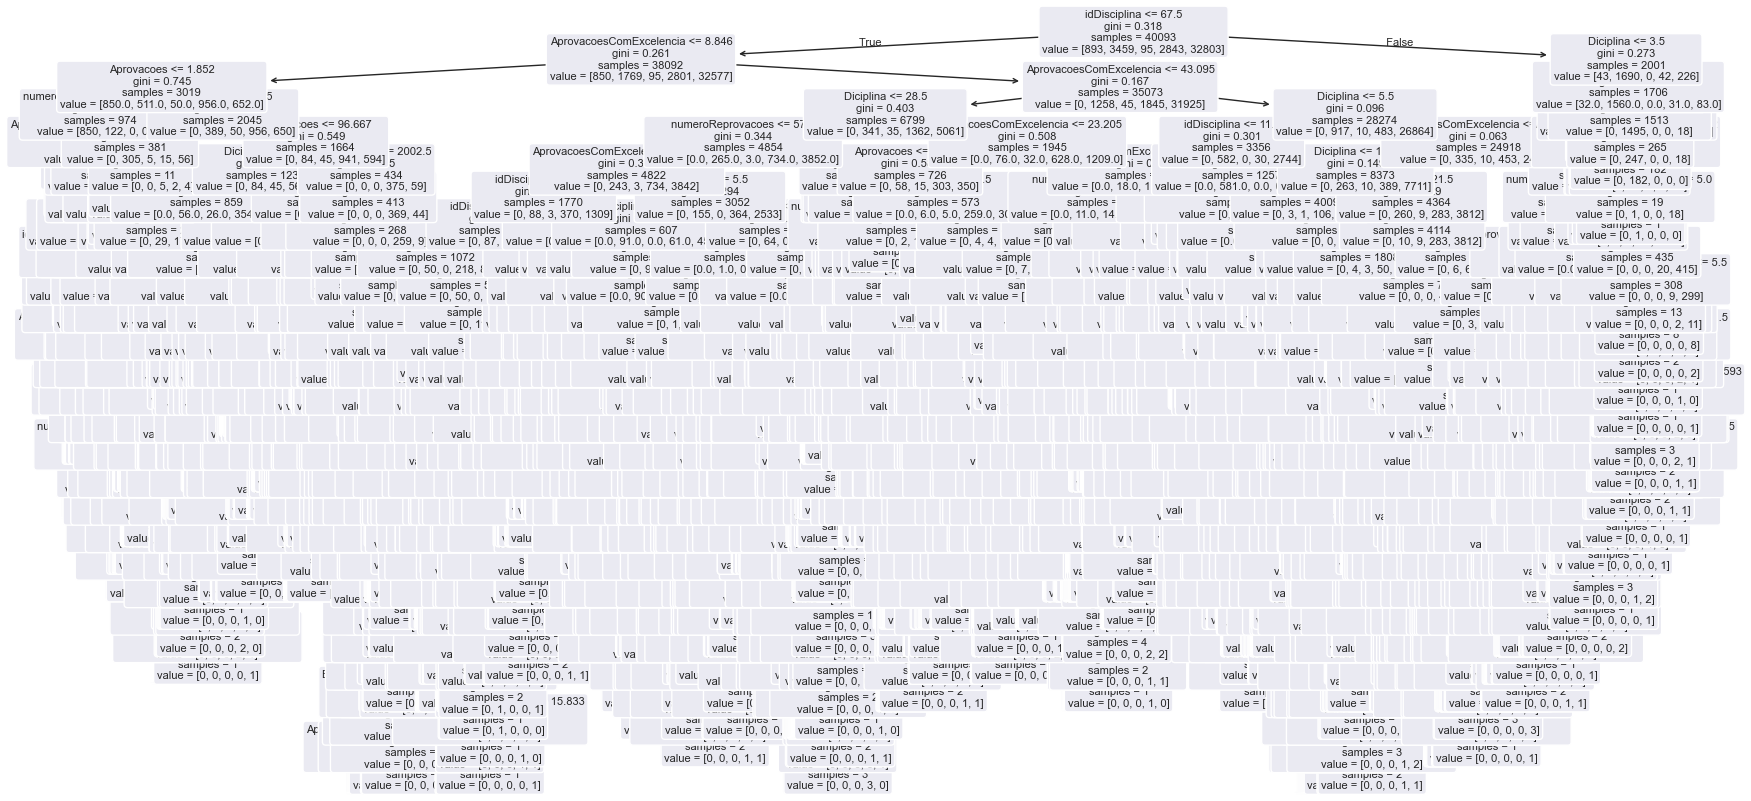

Erro no conjunto de teste: 7.28%


In [27]:
from sklearn.metrics import zero_one_loss
# Dividindo em  dados de treino e validação 10%
X_train, X_val, y_train, y_val = train_test_split(X_treino, Y_treino, test_size=0.1, random_state=30)

g = M.fit(X_train, y_train)
Y_pred = g.predict(X_teste)

# Calcular o erro
e = zero_one_loss(Y_teste, Y_pred)
print("Erro no conjunto de teste:", e)

# Arvore de decisão Completa
plt.figure(figsize=(20, 10))
_ = tree.plot_tree(g, feature_names=X_train.columns, rounded=True, fontsize=8)
plt.show()
print("Erro no conjunto de teste: {:.2f}%".format(e * 100))


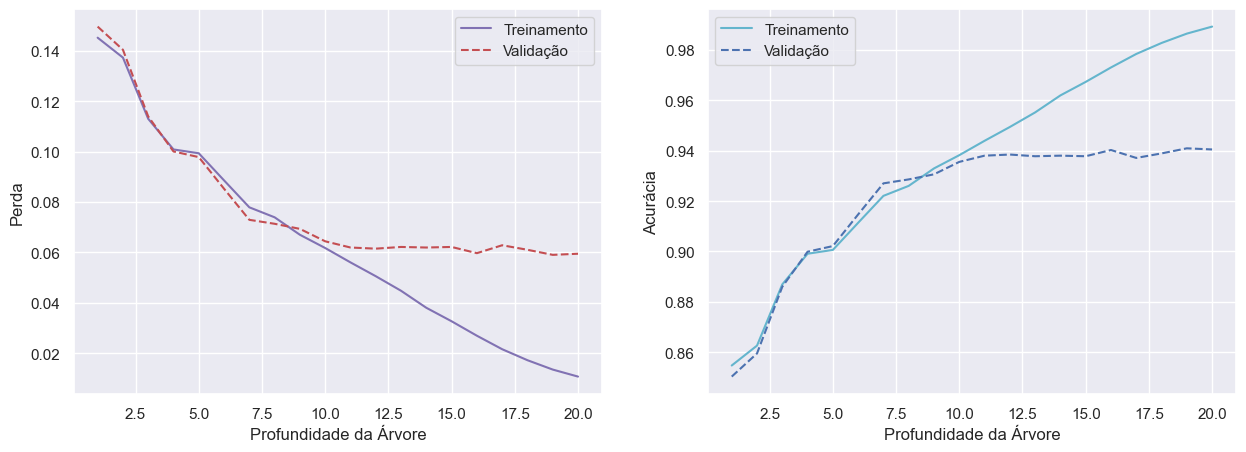

In [34]:
from sklearn.metrics import accuracy_score

# Simulando para diferentes profundidades da árvore Temos:
depths = range(1, 21)
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for depth in depths:
    # Inicializar o modelo com a profundidade máxima especificada
    M = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Treinar o modelo
    M_final = M.fit(X_train, y_train)
    
    # Predições no conjunto de treino e validação
    y_pred_train = M.predict(X_train)
    y_pred_val = M.predict(X_val)
    
    # Calcular acurácia
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    # Calcular perda 
    train_loss = 1 - train_accuracy
    val_loss = 1 - val_accuracy
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plotar histórico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Simular "épocas" com diferentes profundidades
epochs = range(1, len(depths) + 1)

# Plotar perda (loss)
ax1.plot(epochs, train_losses, 'm', label='Treinamento')
ax1.plot(epochs, val_losses, 'r--', label='Validação')
ax1.set_xlabel('Profundidade da Árvore')
ax1.set_ylabel('Perda')
ax1.legend()

# Plotar acurácia (accuracy)
ax2.plot(epochs, train_accuracies, 'c', label='Treinamento')
ax2.plot(epochs, val_accuracies, 'b--', label='Validação')
ax2.set_xlabel('Profundidade da Árvore')
ax2.set_ylabel('Acurácia')
ax2.legend()

plt.show()


## Avaliação do modelo

In [35]:
def confidence(N=30, epsilon=0.1):
    return max(0, 1 - 2*np.e**(-2*N*epsilon**2))

In [36]:
# Nos experimentos meça o erro de generalização com diferentes tamanhos de árvores
#temos para as profundidades:
depths = [1,2, 3, 5, 7, 10, 20]

# Para cada profundidade temos:
for depth in depths:
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_teste)
    # Calculo  do erro 
    error = zero_one_loss(Y_teste, y_pred)
    print("Profundidade da Árvore:", depth, "- Erro de Generalização:", error)


Profundidade da Árvore: 1 - Erro de Generalização: 0.14576443653014504
Profundidade da Árvore: 2 - Erro de Generalização: 0.13902314932587123
Profundidade da Árvore: 3 - Erro de Generalização: 0.1119308064105825
Profundidade da Árvore: 5 - Erro de Generalização: 0.09882981429661664
Profundidade da Árvore: 7 - Erro de Generalização: 0.07987789366573395
Profundidade da Árvore: 10 - Erro de Generalização: 0.0694479776138387
Profundidade da Árvore: 20 - Erro de Generalização: 0.06906639531925718


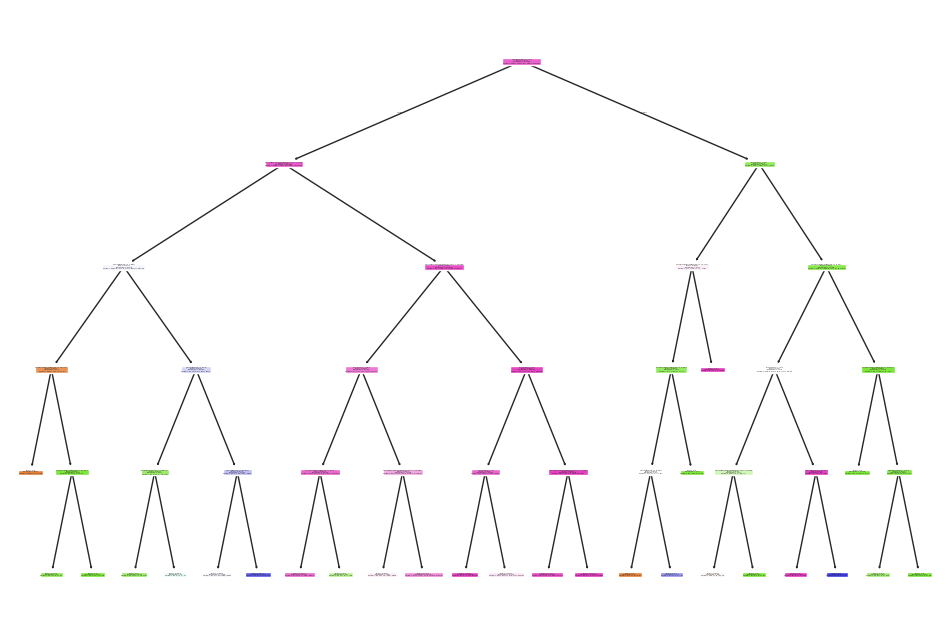

In [37]:
#Podemos notar que com a profundidade 5, econtramos a avore de descisão ideal.
model = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Plotar a árvore IDEAL
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

### Matriz de confusão

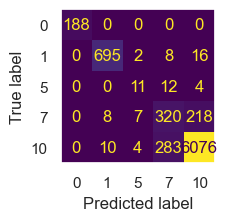

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_teste, Y_pred)
with sns.plotting_context(rc={'grid.linewidth': 0}):
    fig, ax = plt.subplots(figsize=(2,2))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(ax=ax, colorbar=False)

### Definindo as Métricas de Performance.

### Relatório de classificação

In [40]:
from sklearn.metrics import classification_report

target_names = ['Outcome 0', 'Outcome 1']
print(classification_report(Y_teste, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       0.97      0.96      0.97       721
           5       0.46      0.41      0.43        27
           7       0.51      0.58      0.54       553
          10       0.96      0.95      0.96      6373

    accuracy                           0.93      7862
   macro avg       0.78      0.78      0.78      7862
weighted avg       0.93      0.93      0.93      7862

